In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [6]:
train_path = '../input/cell-images/cell_images/train/'
test_path =  '../input/cell-images/cell_images/test/'

os.listdir(train_path), os.listdir(test_path)

(['uninfected', 'parasitized'], ['uninfected', 'parasitized'])

In [7]:
sorted(os.listdir('../input/cell-images/cell_images/train/parasitized/'))[:10]

['C100P61ThinF_IMG_20150918_144104_cell_162.png',
 'C100P61ThinF_IMG_20150918_144104_cell_163.png',
 'C100P61ThinF_IMG_20150918_144104_cell_164.png',
 'C100P61ThinF_IMG_20150918_144104_cell_165.png',
 'C100P61ThinF_IMG_20150918_144104_cell_166.png',
 'C100P61ThinF_IMG_20150918_144104_cell_167.png',
 'C100P61ThinF_IMG_20150918_144104_cell_168.png',
 'C100P61ThinF_IMG_20150918_144104_cell_169.png',
 'C100P61ThinF_IMG_20150918_144104_cell_170.png',
 'C100P61ThinF_IMG_20150918_144104_cell_171.png']

In [8]:
para_cell = train_path + 'parasitized/' + 'C100P61ThinF_IMG_20150918_144104_cell_162.png'
para_cell

'../input/cell-images/cell_images/train/parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [9]:
imread(para_cell).shape

(148, 142, 3)

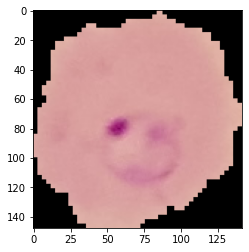

In [10]:
plt.imshow(imread(para_cell))

(139, 160, 3)


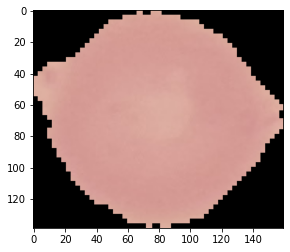

In [11]:
uninfected_cell = train_path + 'uninfected/' + sorted(os.listdir('../input/cell-images/cell_images/train/uninfected/'))[0]
print(imread(uninfected_cell).shape)
plt.imshow(imread(uninfected_cell))

In [12]:
{'train parasitized': len(os.listdir('../input/cell-images/cell_images/train/parasitized/')),
 'train uninfected': len(os.listdir('../input/cell-images/cell_images/train/uninfected/')),
 'test parasitized': len(os.listdir('../input/cell-images/cell_images/test/parasitized/')),
 'test uninfected': len(os.listdir('../input/cell-images/cell_images/test/uninfected/')),
}

{'train parasitized': 12480,
 'train uninfected': 12480,
 'test parasitized': 1300,
 'test uninfected': 1300}

In [13]:
dim1 = []
dim2 = []
for image_filename in os.listdir('../input/cell-images/cell_images/test/uninfected/'):
    img = imread('../input/cell-images/cell_images/test/uninfected/' + image_filename)
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


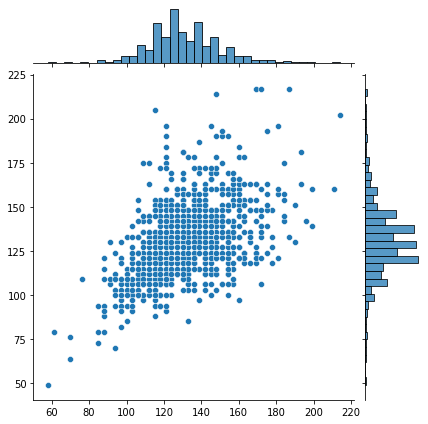

In [14]:
sns.jointplot(dim1, dim2);

In [15]:
np.mean(dim1), np.mean(dim2)

(130.92538461538462, 130.75)

In [16]:
# Final image shape (desired)
image_shape = (130, 130, 3)

In [18]:
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

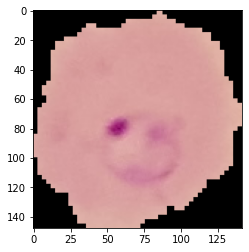

In [19]:
para_image = imread(para_cell)
plt.imshow(para_image)

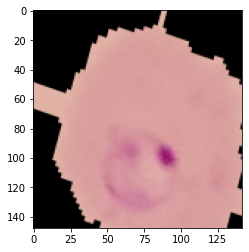

In [20]:
transformed_para_image = image_gen.random_transform(para_image)
plt.imshow(transformed_para_image)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [22]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [25]:
batch_size = 16

In [26]:
train_image_gen = image_gen.flow_from_directory(directory=train_path, 
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 24958 images belonging to 2 classes.


In [27]:
test_image_gen = image_gen.flow_from_directory(directory=test_path, 
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary',
                                                shuffle=False)

Found 2600 images belonging to 2 classes.


In [28]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [30]:
from tensorflow.keras.models import load_model

model = load_model('../input/malaria-detector-model/malaria_detector.h5')

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [32]:
model.metrics_names

['loss', 'accuracy']

In [33]:
model.evaluate_generator(test_image_gen)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[35.03255844116211, 0.870769202709198]

In [48]:
preds = model.predict_generator(test_image_gen)
predictions = preds > 0.5

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1300
           1       0.97      0.76      0.85      1300

    accuracy                           0.87      2600
   macro avg       0.89      0.87      0.87      2600
weighted avg       0.89      0.87      0.87      2600



In [51]:
confusion_matrix(test_image_gen.classes, predictions)

array([[1272,   28],
       [ 314,  986]])

In [52]:
para_cell

'../input/cell-images/cell_images/train/parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'

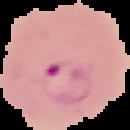

In [55]:
from tensorflow.keras.preprocessing import image

my_image = image.load_img(para_cell, target_size=image_shape)
my_image

In [61]:
my_image_array = image.img_to_array(my_image)
my_image_array.shape

(130, 130, 3)

In [62]:
my_image_array = np.expand_dims(my_image_array, axis=0)
my_image_array.shape

(1, 130, 130, 3)

In [63]:
model.predict(my_image_array)

array([[0.]], dtype=float32)

In [64]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}